# Lei de Moore (Regressão Linear)

A [lei de Moore](https://en.wikipedia.org/wiki/Moore%27s_law) é a observação de que o número de transistores em um circuito integrado (CI) denso dobra a cada dois anos. A lei de Moore é uma observação e projeção de uma tendência histórica. Mais do que uma lei da física, é uma relação empírica ligada aos ganhos da experiência na produção.

A observação leva o nome de Gordon Moore, o cofundador da Fairchild Semiconductor e da Intel (e ex-CEO desta última), que em 1965 postulou uma duplicação a cada ano no número de componentes por circuito integrado, e projetou esta taxa de crescimento continuaria por pelo menos mais uma década. Em 1975, olhando para a próxima década, ele revisou a previsão para dobrar a cada dois anos, uma **compound annual growth rate** (CAGR) de 41%. Embora Moore não tinha usado evidências empíricas para prever que a tendência histórica continuaria, sua previsão se manteve desde 1975 e desde então se tornou conhecida como uma "lei".

Neste nootebook vamos trabalhar com dados históricos de transistores de forma a criarmos um modelo linear que se ajuste a estes dados.

Iniciaremos importando as bibliotecas necessárias:

In [47]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Obtemos os dados:

In [48]:
!wget -nc https://gist.githubusercontent.com/the-akira/5fe07b248b52c442dd1632702d5da095/raw/93d24c0132c92bc9e00da4dbe6820ae356dfaf5a/moore.csv

--2021-06-18 18:36:07--  https://gist.githubusercontent.com/the-akira/5fe07b248b52c442dd1632702d5da095/raw/93d24c0132c92bc9e00da4dbe6820ae356dfaf5a/moore.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2301 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-06-18 18:36:07 (24.1 MB/s) - ‘moore.csv’ saved [2301/2301]



Carregamos os dados em um pandas DataFrame:

In [49]:
data = pd.read_csv('moore.csv', header=None)
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


Separamos os dados em **X** e **Y**:

In [50]:
dados = data.values
# tornaremos eles um array 2D de tamanho N x D, onde D = 1
X = dados[:,0].reshape(-1, 1)
Y = dados[:,1].reshape(-1, 1)

Plotamos os dados (observe que há um crescimento exponencial):

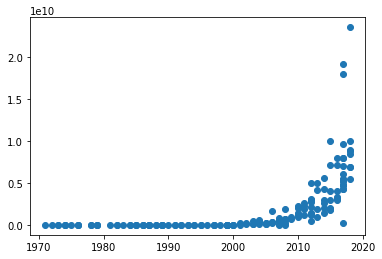

In [51]:
plt.scatter(X, Y);

Como desejamos um modelo linear, vamos então extrair o log de **Y**:

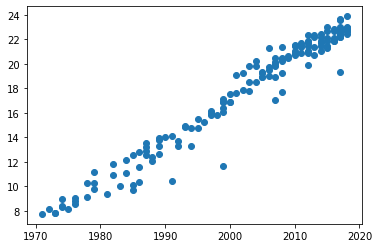

In [52]:
Y = np.log(Y)
plt.scatter(X, Y);

Faremos o scaling e centralizaremos ambos os eixos **X** e **Y**:

In [53]:
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()

X = (X - mx)/sx
Y = (Y - my)/sy

Agora tudo está centralizado e em uma pequena variação:

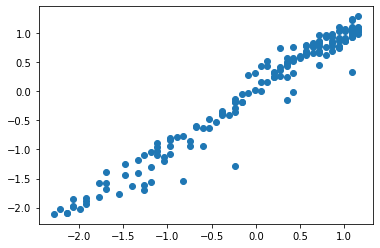

In [54]:
plt.scatter(X, Y);

Convertemos os dados para **float32**:

In [55]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

Criamos o modelo de Regressão Linear:

In [56]:
model = nn.Linear(1, 1)

Definimos a função Loss e o Optimizer:

In [57]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

Convertemos os dados para o formato aceito pelo PyTorch:

In [58]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

type(inputs)

torch.Tensor

E então treinamos o modelo:

In [59]:
n_epochs = 100
losses = []

for it in range(n_epochs):
    # zeramos os parâmetros do gradient
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # registramos o loss
    losses.append(loss.item())

    # backward e optimize
    loss.backward()
    optimizer.step()

    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 2.6732
Epoch 2/100, Loss: 2.5688
Epoch 3/100, Loss: 2.3983
Epoch 4/100, Loss: 2.1914
Epoch 5/100, Loss: 1.9697
Epoch 6/100, Loss: 1.7483
Epoch 7/100, Loss: 1.5366
Epoch 8/100, Loss: 1.3403
Epoch 9/100, Loss: 1.1622
Epoch 10/100, Loss: 1.0032
Epoch 11/100, Loss: 0.8630
Epoch 12/100, Loss: 0.7407
Epoch 13/100, Loss: 0.6348
Epoch 14/100, Loss: 0.5435
Epoch 15/100, Loss: 0.4654
Epoch 16/100, Loss: 0.3988
Epoch 17/100, Loss: 0.3421
Epoch 18/100, Loss: 0.2941
Epoch 19/100, Loss: 0.2534
Epoch 20/100, Loss: 0.2191
Epoch 21/100, Loss: 0.1902
Epoch 22/100, Loss: 0.1658
Epoch 23/100, Loss: 0.1453
Epoch 24/100, Loss: 0.1280
Epoch 25/100, Loss: 0.1136
Epoch 26/100, Loss: 0.1014
Epoch 27/100, Loss: 0.0912
Epoch 28/100, Loss: 0.0826
Epoch 29/100, Loss: 0.0755
Epoch 30/100, Loss: 0.0695
Epoch 31/100, Loss: 0.0644
Epoch 32/100, Loss: 0.0602
Epoch 33/100, Loss: 0.0567
Epoch 34/100, Loss: 0.0537
Epoch 35/100, Loss: 0.0512
Epoch 36/100, Loss: 0.0491
Epoch 37/100, Loss: 0.0474
Epoch 38/1

Plotamos o loss por iteração para confirmar que ela convergiu:

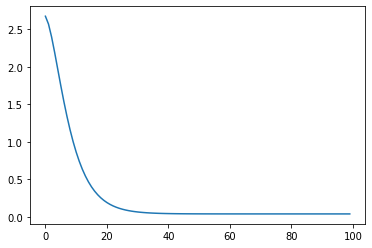

In [60]:
plt.plot(losses);

Plotamos o gráfico com os dados originais e a linha ajustada:

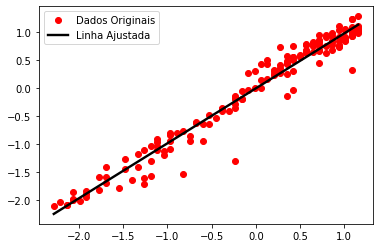

In [61]:
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Dados Originais')
plt.plot(X, predicted, label='Linha Ajustada', c='k', lw=2.4)
plt.legend();

## Transformando os Dados de volta à Escala Original

Nossa hipótese original é que o crescimento é exponencial. Com o formato:

$$ C = C_0 r ^ t $$

Nessa equação, $C$ é a contagem do transistor, $t$ é o ano, $C_0$ é a contagem original do transistor no ano $0$ e $r$ é a taxa de crescimento.

Tornamos essa equação linear tomando o logaritmo de ambos os lados.

$$ \log C = \log C_0 + \log r * t $$

Aqui, $\log C$ representa a variável que segue ao longo do eixo y, e $t$ representa a variável que segue ao longo do eixo x.

Em outras palavras, em nosso modelo hipotético, o log das contagens de transistores é linear em relação ao tempo.

Vamos renomear as variáveis para uma forma mais familiar:

$$ y = a x + \log C_0 $$

Agora $y = \log C$ representa o log das contagens de transistores e $x = t$ representa o tempo. $a = \log r$ é a inclinação e $\log C_0$ é a interceptação y.

### Nosso Modelo

Normalizamos os dados da seguinte forma:

$$ y' = \frac{y - m_y}{s_y} $$

$$ x' = \frac{x - m_x}{s_x} $$

Aqui, $m_x$ representa a média da amostra de $x$ e $s_x$ representa o desvio padrão da amostra de $x$, com definições análogas para $m_y$ e $s_y$.

Nosso modelo se parece com:

$$ y' = wx' + b $$

Podemos recuperar o modelo original substituindo $x'$ e $y'$ por expressões correspondentes em termos de $x$ e $y$.

$$ \frac{y - m_y}{s_y} = w \frac{x - m_x}{s_x} + b $$

Depois de alguma manipulação algébrica, obtemos:

$$ y = w \frac{s_y}{s_x} x - w \frac{s_y}{s_x} m_x + b s_y + m_y = a x + \log C_0 $$

É claro que o coeficiente na frente de $x$ representa nosso $a$ original, e a soma de todos os outros termos representa $\log C_0$.

Estamos interessados apenas no tempo de duplicação, então descobrimos que:

$$ a = w \frac{s_y}{s_x} $$

In [63]:
w = model.weight.data.numpy()
a = w[0,0] * sy / sx
print(a)

0.3415944348286519


## Modelo de Crescimento Exponencial

Nossa equação atualmente é linear. Ainda precisamos encontrar o tempo de duplicação.

Nosso modelo original para crescimento exponencial é:

$$ C = C_0 r^t $$

Onde $C$ é o transistor (a contagem) e $t$ é o ano.

$ r $ é a taxa de crescimento. Por exemplo, quando $ t $ vai de 1 para 2, $ C $ aumenta por um fator de $ r $. Quando $ t $ passa de 2 para 3, $ C $ aumenta por um fator de $ r $ novamente.

Quando extraímos o log de ambos os lados, obtemos:

$$ \log C = \log r * t + \log C_0 $$

Esta é nossa equação linear:

$$ y = ax + \log C_0 $$

Onde:

$$ y = \log C $$
$$ a = \log r $$
$$ x = t $$

Estamos interessados em $ r $, porque essa é a taxa de crescimento. Dados nossos **weights** de regressão, sabemos que:

$$ a = 0.341659983 $$

De modo que:

$$ r = e^{0.341659983} = 1.40728 $$

Para descobrir o tempo que leva para a contagem do transistor dobrar, simplesmente precisamos encontrar a quantidade de tempo que leva para $ C $ aumentar para $ 2C $.

Vamos chamar o tempo inicial original de $ t $, para corresponder à contagem inicial do transistor de $ C $.

Vamos chamar o tempo final de $ t '$, para corresponder à contagem final do transistor de $ 2C $.

Então também temos:

$$ 2C = C_0 r ^ {t'} $$

Combine isso com nossa equação original:

$$ C = C_0 r^t $$

Obtemos (dividindo as 2 equações):

$$ 2C/C = (C_0 r ^ {t'}) / C_0 r^t $$

O que simplifica para:

$$ 2 = r^{(t' - t)} $$

Resolvemos para $ t '- t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$

Nota importante! Não especificamos qual é o tempo de início $ t $ realmente, e não precisamos, já que acabamos de provar que isso vale para qualquer $ t $.

In [65]:
print("Tempo para dobrar:", np.log(2) / a)

Tempo para dobrar: 2.0291524389372344
